In [15]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from astropy.io import fits
import astropy 
import pyvo as vo


In [16]:
tap = vo.dal.TAPService('http://cda.cfa.harvard.edu/csc2tap');

In [17]:
for i, tblname in enumerate(tap.tables.keys()):
    print(f"{i + 1:2d} - {tblname}")

 1 - TAP_SCHEMA.schemas
 2 - TAP_SCHEMA.tables
 3 - TAP_SCHEMA.columns
 4 - TAP_SCHEMA.keys
 5 - TAP_SCHEMA.key_columns
 6 - csc2.master_source
 7 - csc2.stack_source
 8 - csc2.observation_source
 9 - csc2.master_stack_assoc
10 - csc2.stack_observation_assoc
11 - csc2.detect_stack
12 - csc2.valid_stack
13 - csc2.likely_stack
14 - csc2.cross_match
15 - csc2.cone
16 - csc2.image
17 - ivoa.ObsCore


# Download all CSC sources

In [18]:
qry = """
SELECT m.name, m.ra, m.dec, m.conf_flag, m.significance, m.extent_flag, m.sat_src_flag,m.gal_l,m.gal_b,m.err_ellipse_r0,m.err_ellipse_r1,m.significance,m.likelihood,m.conf_flag,m.dither_warning_flag,m.extent_flag,m.pileup_flag,m.sat_src_flag,m.streak_src_flag,m.var_flag,m.var_inter_hard_flag,
m.flux_aper_b,m.flux_aper_lolim_b,m.flux_aper_hilim_b,m.flux_aper_h,m.flux_aper_lolim_h,m.flux_aper_hilim_h,m.flux_aper_m,m.flux_aper_lolim_m,m.flux_aper_hilim_m,m.flux_aper_s,m.flux_aper_lolim_s,m.flux_aper_hilim_s,m.flux_aper_u,m.flux_aper_lolim_u,m.flux_aper_hilim_u,m.hard_hm,m.var_inter_hard_prob_hm,m.var_inter_hard_sigma_hm,m.hard_hs,m.var_inter_hard_prob_hs,m.hard_ms,m.var_inter_hard_prob_ms,m.var_intra_index_b,m.var_intra_prob_b,m.ks_intra_prob_b,m.kp_intra_prob_b,m.var_inter_index_b,m.var_inter_prob_b,m.var_inter_sigma_b,m.gal_l,m.gal_b

FROM csc2.master_source m
WHERE m.name NOT LIKE '%X'
"""

In [20]:
cat = tap.search(qry)

In [21]:
import pandas as pd 

In [22]:
tbl = cat.to_table()
tbl['name'] = [str(n) for n in tbl['name']]
tbl.write('chandra_all_sources_v2.csv', format='csv', overwrite=True)

### Plot these sources

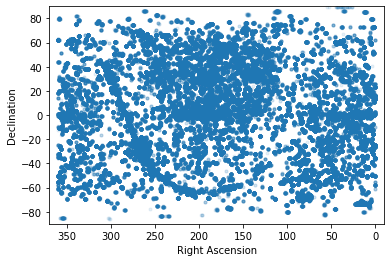

In [23]:
plt.plot(cat['ra'], cat['dec'], '.', alpha=0.1)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.ylim(-90, 90)
plt.xlim(370, -10);

In [4]:
idx = (cat['flux_aper_b'] > 0) & (cat['significance'] > 0)
plt.hexbin(cat['flux_aper_b'][idx], cat['significance'][idx],
           xscale='log', yscale='log', mincnt=1)
plt.colorbar()
plt.xlabel('Flux (aper_b)')
plt.ylabel('Significance');

NameError: name 'cat' is not defined

In [1]:
df = pd.DataFrame(cat)
df  

^C
